# The KNN Algorithm For classification

<blockquote>First, we woulod import the modules</blockquote>

In [1]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<blockquote>then,we would import the data as a csv file</blockquote>

In [2]:
data=pd.read_csv("C:\\Users\\somy\\Downloads\\stack-overflow-developer-survey-2020\\breast-cancer-wisconsinData.csv")

<blockquote>i left a file called "names" to get more info about the data<blockquote>

<b> before start in coding i consider you know what is the KNN algorithm is,if you do not,visit:
<li>https://www.youtube.com/watch?v=4HKqjENq9OU</li>
<li> https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623
<li>https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761<li>
     <blockquote>these links will help you to understand the algorithm<blockquote>

<b>we will explore the data

In [3]:
data.shape

(699, 11)

In [4]:
print(data.isna().sum())

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [5]:
data.mode()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1182404,1,1,1,1,2,1,2,1,1,2


In [6]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


data.columns.tolist()

>> Those numbers appear in the data for the levels in each column,you could visit:
<li>https://www.sciencedirect.com/science/article/pii/S2352914820306092

# Data Cleaning

<b> We will drop duplicates to avoid bias in our model 

In [7]:
data.duplicated().sum()

8

In [8]:
data.drop_duplicates(inplace=True)
data.drop(columns=["Sample code number"],inplace=True)

<b>we are going to see the unique data in every single column

In [9]:
for columnData in data.iloc[:,:]:
    columnData1=data[columnData]
    print('Column Name : ', columnData)
    x=columnData1.unique()
    print('Column Contents : ',x)

Column Name :  Clump Thickness
Column Contents :  [ 5  3  6  4  8  1  2  7 10  9]
Column Name :  Uniformity of Cell Size
Column Contents :  [ 1  4  8 10  2  3  7  5  6  9]
Column Name :  Uniformity of Cell Shape
Column Contents :  [ 1  4  8 10  2  3  5  6  7  9]
Column Name :  Marginal Adhesion
Column Contents :  [ 1  5  3  8 10  4  6  2  9  7]
Column Name :  Single Epithelial Cell Size
Column Contents :  [ 2  7  3  1  6  4  5  8 10  9]
Column Name :  Bare Nuclei
Column Contents :  ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Column Name :  Bland Chromatin
Column Contents :  [ 3  9  1  2  4  5  7  8  6 10]
Column Name :  Normal Nucleoli
Column Contents :  [ 1  2  7  4  5  3 10  6  9  8]
Column Name :  Mitoses
Column Contents :  [ 1  5  4  2  3  7 10  8  6]
Column Name :  Class
Column Contents :  [2 4]


<b> you can note "Bare Nuclei" column... And I'm going to pause for a while and tell you something my teacher:
    <li>https://github.com/Ahmed-Hereiz
    taught me,dealing with missing data makes you model more professional,you can deal with it by a lot methods i chose the EM algorithm,and you can try the technique that makes sense of your data.

>I ran the test on spss programm and this is my result

In [10]:
indices = [23,40,139,145,158,164,235,249,275,292,294,297,315,321,411,617]
data.loc[indices,'Bare Nuclei'] =[5,8,1,2,2,2,3,2,2,6,1,2,6,2,1,1]

>we will check the data agian,and change the type,too.

In [11]:
data["Bare Nuclei"]=data["Bare Nuclei"].astype("int64")
for columnData in data.iloc[:,:]:
    columnData1=data[columnData]
    print('Column Name : ', columnData)
    x=columnData1.unique()
    print('Column Contents : ',x)

Column Name :  Clump Thickness
Column Contents :  [ 5  3  6  4  8  1  2  7 10  9]
Column Name :  Uniformity of Cell Size
Column Contents :  [ 1  4  8 10  2  3  7  5  6  9]
Column Name :  Uniformity of Cell Shape
Column Contents :  [ 1  4  8 10  2  3  5  6  7  9]
Column Name :  Marginal Adhesion
Column Contents :  [ 1  5  3  8 10  4  6  2  9  7]
Column Name :  Single Epithelial Cell Size
Column Contents :  [ 2  7  3  1  6  4  5  8 10  9]
Column Name :  Bare Nuclei
Column Contents :  [ 1 10  2  4  3  9  7  5  8  6]
Column Name :  Bland Chromatin
Column Contents :  [ 3  9  1  2  4  5  7  8  6 10]
Column Name :  Normal Nucleoli
Column Contents :  [ 1  2  7  4  5  3 10  6  9  8]
Column Name :  Mitoses
Column Contents :  [ 1  5  4  2  3  7 10  8  6]
Column Name :  Class
Column Contents :  [2 4]


>everything is clean

<b>We need to explore the data by visualization

# the implementation of the algorithm 

<b>First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.

In [216]:
x=data.iloc[:,:9]#slicing the independant variables into two groups...
y=data.iloc[:,9]#same thing with the dependant
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
#you could see print them and see the len of sets
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

552
139
552
139


<b>The obtained data contains features of completely different dimensions and scales. Different measures of data properties affect data set modeling inversely,
fit_transform() helps to fit the output, and pay attention to StandardScaler is Z-distribution

In [217]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

<b>after splitting the data and traing it, we have to execute KNeighborsClassifier and enter K value and other parametrs

In [236]:
classify=KNeighborsClassifier(n_neighbors=7,p=2,metric="euclidean")

>to know more about this function,visit:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

<b>it is time to make classification

In [237]:
classify.fit(x_train,y_train)
y_pred=classify.predict(x_test)

<b>confusion_matrix is a func that will help us to evaluate the predictions

In [238]:
print(confusion_matrix(y_test,y_pred))
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[[87  5]
 [ 2 45]]


Predicted,2,4,All
True,,,
2,87,5,92
4,2,45,47
All,89,50,139


<b>what does is the output mean?
<li># Take a look at the values 5 and 2, at 5 these are five negative positive predictions and at 2 these two values are two negative positives
<li>This will tell you the wrong predictions that occurred
<li>On the other hand, values 87,45 are predicted correctly.

<blockquote>this pic below will explain it clearly<blockquote>

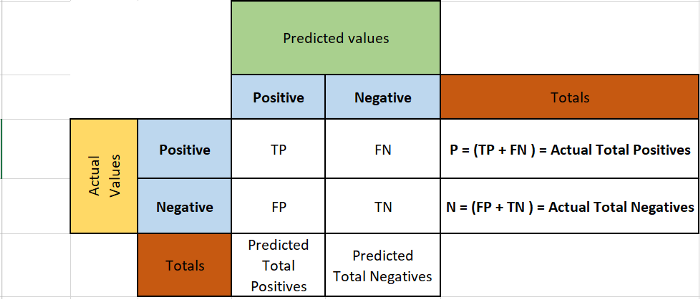

classification_report 

<b>we have to evaluate the model so we will call classification_report 

In [239]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96        92
           4       0.90      0.96      0.93        47

    accuracy                           0.95       139
   macro avg       0.94      0.95      0.94       139
weighted avg       0.95      0.95      0.95       139



<b>what does the output mean?
  <ol>
<li>precision: Percentage of correct positive predictions relative to total positive predictions.</li>
<li>Percentage of correct positive predictions relative to total actual positives.      
<li>F1 score ,What percent of positive predictions were correct? so,F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
</li>
</ol>

<b>It is time to calculate the accuracy of our model

In [240]:
print(accuracy_score(y_test,y_pred))

0.9496402877697842


<b>now,we will calculate the error rate and this will tell us the optimal K value that we will use it in our model

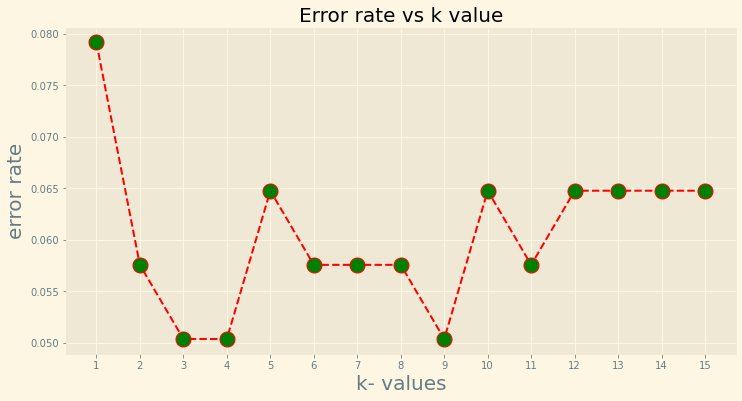

In [241]:
error_rate = []
for i in range(1,31,2):#we will try values of K and calculate the error rate of thrm
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
#plotting the error rate vs k graph 
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,6))
plt.plot(range(1,16),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,16))
plt.show()

<b>go back and replace the optimal value of K

# we finished our algoritm i hope it is useful for you